# Recipes Recommendation Systems

## Content-Based Recommender

**Content-based recommender** is the recommending system to rely on the similarity of items when it recommends items to users. For example, when a user likes a specific recipe, the system finds and recommends the items which have similar ingredients to the recipes the user likes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the Data

In [2]:
recipes = pd.read_csv('recipes.csv')

In [3]:
recipes.head(5)

,id,calories,category,ingredients,ratings,recipe_id,reviews,title,total_mins
0,0,728,"Desserts, Fruit Desserts, Pineapple Desserts","['2 cups all-purpose flour', '1 teaspoon salt'...",4.703704,263516,23,Chef John's Carrot Cake,95
1,1,692,"Bread, Yeast Bread","['1/2 cup warm milk', '1/3 cup warm water', '1...",4.666667,272625,2,Khachapuri (Georgian Cheese Bread),115
2,2,209,"Soups, Stews and Chili, Stews, Beef","['1 (1 1/2-pound) flank steak', '2 teaspoons k...",5.000000,272615,4,Ropa Vieja (Cuban Beef),690
3,3,505,"Everyday Cooking, Vegetarian, Side Dishes","['2 cups whole milk', '1 teaspoon kosher salt,...",4.333333,272461,9,"""Instant"" Mac and Cheese",28
4,4,291,"Bread, Yeast Bread","['1 cup warm water', '1 tablespoon white sugar...",5.000000,271049,4,Kouign-Amann,275


Check the size of the dataset.

In [4]:
recipes.shape

(1162, 9)

It has 1162 recipes. Check how many missng values are in each column.

In [5]:
# create a function to create a table showing the numbers of missing values for each feature
def create_missing_df(dataframe):
  
  missing_index = dataframe.columns.tolist() 
  missing = dataframe.isnull().sum().tolist()
  missing_df = pd.DataFrame({'Missing':missing}, index=missing_index)

  return missing_df

In [6]:
recipes = recipes.dropna()
create_missing_df(recipes)

,Missing
id,0
calories,0
category,0
ingredients,0
ratings,0
recipe_id,0
reviews,0
title,0
total_mins,0


In [8]:
# count the number of occurences for each category in the data set
counts = dict()

for i in recipes.index:
  for g in recipes.loc[i,'category'].split(', '):
    if g not in counts:
      counts[g] = 1
    else:
      counts[g] = counts[g] + 1

print(counts)

{'Desserts': 94, 'Fruit Desserts': 25, 'Pineapple Desserts': 3, 'Bread': 71, 'Yeast Bread': 39, 'Soups': 85, 'Stews and Chili': 79, 'Stews': 21, 'Beef': 30, 'Everyday Cooking': 17, 'Vegetarian': 7, 'Side Dishes': 2, 'Main Dish': 110, 'Ribs': 9, 'Side Dish': 222, 'Vegetables': 54, 'Strawberry Desserts': 5, 'World Cuisine': 153, 'European': 94, 'Italian': 58, 'Stuffed Main Dishes': 3, 'Stuffed Bell Peppers': 2, 'Roasts': 5, 'Pot Roast': 2, 'Pasta': 12, 'Macaroni and Cheese': 3, 'Baked Macaroni and Cheese': 1, 'Seafood': 75, 'Shellfish': 17, 'Shrimp': 11, 'Quick Bread': 29, 'Biscuits': 5, 'Lemon Desserts': 5, 'Breakfast and Brunch': 52, 'Pancakes': 8, 'Irish Stew': 3, 'Soup': 52, 'Vegetable Soup': 21, 'Potatoes': 30, 'Mashed Potatoes': 4, 'Meat and Poultry': 152, 'Chicken': 62, 'Chicken Thighs': 9, 'Asian': 36, 'Thai': 2, 'Fruits and Vegetables': 6, 'Squash': 13, 'Pork': 55, 'Pork Chops': 9, 'Breakfast Bread': 2, 'Sauces and Condiments': 105, 'Sauces': 61, 'Wing Sauce': 2, 'Jambalaya': 1,

Text(0, 0.5, 'Counts')

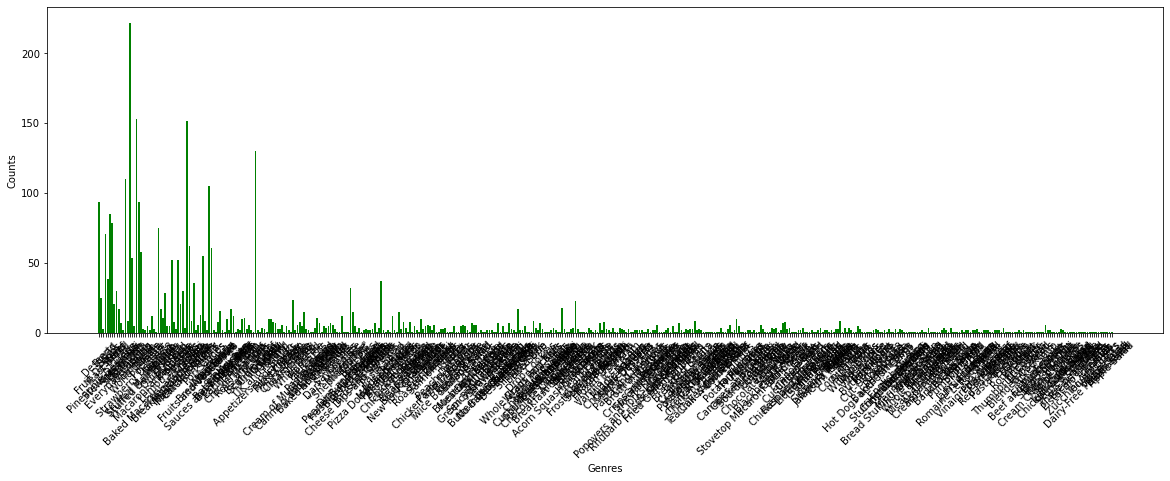

In [9]:
plt.figure(figsize=(20,6))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')

### Term Frequency and Inverse Document Frequency (tf-idf)

The **TfidVectorizer()** class from the **sklearn.feature_extraction.text** library helps us to calculate the **tf-idf** scores for each category in each recipe.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf_vector = TfidfVectorizer(stop_words='english') # create an object for TfidfVectorizer
tfidf_matrix = tfidf_vector.fit_transform(recipes['category']) # apply the object to the category column

The list and order of ingredients used in the vectorization are as follows:

In [12]:
print(list(enumerate(tfidf_vector.get_feature_names())))

[(0, 'acorn'), (1, 'african'), (2, 'alfredo'), (3, 'american'), (4, 'antipasto'), (5, 'appetizers'), (6, 'apple'), (7, 'asian'), (8, 'asparagus'), (9, 'au'), (10, 'baby'), (11, 'bacon'), (12, 'bagels'), (13, 'bake'), (14, 'baked'), (15, 'balls'), (16, 'banana'), (17, 'bars'), (18, 'bbq'), (19, 'bean'), (20, 'beans'), (21, 'beef'), (22, 'beer'), (23, 'belgian'), (24, 'bell'), (25, 'biscuits'), (26, 'black'), (27, 'blackberry'), (28, 'blended'), (29, 'bleu'), (30, 'blueberry'), (31, 'borscht'), (32, 'bowls'), (33, 'brazilian'), (34, 'bread'), (35, 'breakfast'), (36, 'breasts'), (37, 'brie'), (38, 'brittle'), (39, 'broccoli'), (40, 'broiled'), (41, 'broth'), (42, 'brown'), (43, 'brownies'), (44, 'brunch'), (45, 'bruschetta'), (46, 'brussels'), (47, 'buns'), (48, 'burgers'), (49, 'butter'), (50, 'buttermilk'), (51, 'butternut'), (52, 'butters'), (53, 'cabbage'), (54, 'cacciatore'), (55, 'cake'), (56, 'cakes'), (57, 'canapes'), (58, 'candy'), (59, 'canning'), (60, 'caribbean'), (61, 'carrot

Let's see the examples of the vectorization for the first 5 recipes.

In [13]:
print(tfidf_matrix[:5])

  (0, 252)	0.5052617221388709
  (0, 146)	0.3328192741666906
  (0, 110)	0.7962046991097326
  (1, 383)	0.5043069695782291
  (1, 34)	0.8635244527138899
  (2, 21)	0.44991084010644666
  (2, 70)	0.36459572038874133
  (2, 333)	0.7291914407774827
  (2, 317)	0.36459572038874133
  (3, 115)	0.5434048991986954
  (3, 371)	0.5315345544906511
  (3, 86)	0.459446478335225
  (3, 132)	0.459446478335225
  (4, 383)	0.5043069695782291
  (4, 34)	0.8635244527138899


In [14]:
tfidf_matrix.shape

(1162, 387)

In [15]:
# the first row vector of tfidf_matrix
tfidf_matrix.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

Next, let's caculate the similarity between two recipes using the **tf-idf matrix**. The **cosine similarity** is used to calculate the similarity, and **linear_kernel()** class is used to calculate this.

In [16]:
from sklearn.metrics.pairwise import linear_kernel

In [17]:
sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) # create the cosine similarity matrix
print(sim_matrix)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.52988262 0.        ]
 [0.         0.         0.         ... 0.52988262 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


**sim_matrix**$_{ij}$ is the similarity score between recipe $i$ and recipe $j$.Therefore, the diagonal elements in the matrix represent the similarity scores of a category with itself, and therefore, the value should be 1. By the definition of the matrix, **sim_matrix**$_{ij}$ = **sim_matrix**$_{ji}$. 

### Make the Recommendation Engine 

The **sim_matrix** is based on the index of each recipe. Therefore, we need to convert ingredient name into recipe index and recipe index into ingredient name. Let's create functions which operate those functions.

In [33]:
# the function to convert from title to index
def get_index_from_title(title):

  return recipes[recipes.title == title]['id'].values[0]

In [34]:
def get_title_from_index(index):

  return recipes[recipes['id'] == index]['title'].values[0]

#### Apply Levenshtein Distance for 'Did you mean?' Algorithm

We often misspell titles of recipes when we use recipe recommending system. When we use *Google* to search recipes, if we misspell the title of the recipe, we see that *Google* asks us, *'Did you mean...?'*. Let's create the similar function to correct misspelled title in order to make the system work easily. I apply **Levenshtein Distance** in order to implement *'Did you mean...?'* algorithm. **fuzzywuzzy** library in Python provides **fuzz** class for the **Levenshtein Distance**.

!pip install fuzzywuzzy

In [27]:
from fuzzywuzzy import fuzz

In [28]:
# create a function to find the closest title
def matching_score(a,b):

  return fuzz.ratio(a,b)

print(matching_score('Crispy Beer Batter Fish & Chips', 'Carrot Cake'))

29


**fuzz.ratio(a,b)** calculates the Levenshtein Distance between **a** and **b**, and return the score for the distance. If the two words, **a** and **b**, are exactly the same, the score becomes 100. As the distance between the words increases, the score falls. 

In [42]:
# the function to return the most similar title to the words a user types
def find_closest_title(title):

  leven_scores = list(enumerate(recipes['title'].apply(matching_score, b=title)))
  sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
  print(sorted_leven_scores[0])
  closest_title = get_title_from_index(sorted_leven_scores[0][0])
  distance_score = sorted_leven_scores[0][1]

  return closest_title, distance_score

The function **find_closest_title()** is supposed to return the most similar title to the words a user types. Without this, the recommending system only works when the movie title a user types is exactly the same as the movie title the system has.  

#### Create the Recommending System

In [45]:
def contents_based_recommender(recipe_user_likes, how_many):

  closest_recipe, distance_score = find_closest_title(recipe_user_likes)

  if distance_score == 100:

    recipe_index = get_index_from_title(closest_recipe)
    recipes_list = list(enumerate(sim_matrix[int(recipe_index)]))
    similar_recipes = list(filter(lambda x:x[0] != int(recipe_index), sorted(recipes_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

    print('Here\'s the list of recipes similar to '+'\033[1m'+str(closest_recipe)+'\033[0m'+'.\n')

    for i,s in similar_recipes[:how_many]: 
      print(get_title_from_index(i))
    

  else:
    print('Did you mean '+'\033[1m'+str(closest_recipe)+'\033[0m'+'?','\n')

    recipe_index = get_index_from_title(closest_recipe)
    recipes_list = list(enumerate(sim_matrix[int(recipe_index)]))
    similar_recipes = list(filter(lambda x:x[0] != int(recipe_index), sorted(recipes_list,key=lambda x:x[1], reverse=True)))

    print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_recipe)+'\033[0m'+'.\n')

    for i,s in similar_recipes[:how_many]:
      print(get_title_from_index(i))

The recommending system returns the list of recipes similar to the one a user likes. It finds and recommends recipes even if the user misspell the name of the recipe they like. If the user misspell the name, the system finds the most similar name to the words the user types and recommends recipes based on the one it found alternatively.  

#### Test the System

Let's find similar recipes to **'Miso-Glazed Black'**. Set the number of the recommended recipes as 10. 

In [46]:
contents_based_recommender('Miso-Glazed Black', 10)

(325, 89)
Did you mean Miso-Glazed Black Cod? 

Here's the list of movies similar to Miso-Glazed Black Cod.

How to Cook Trout
Chef John's Spaghetti with Red Clam Sauce
Brown Butter Perch
BBQ Broiled Red Snapper
Prawns Provencale
Chef John's Peach Melba
Creole Crab Noodles
Mini Buffalo Chicken Egg Rolls
Seafood Sausage
Chicken Little (Semi-Boneless Roast Game Hen)


The recommending system found pretty similar movies to the movie I chose.